In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/UKSPA.csv')


In [3]:
df.head()

,Latitude,Longitude
0,51.809568,-0.356322
1,51.796893,-0.200595
2,52.454008,-1.933663
3,52.397038,-1.986171
4,52.488656,-1.887221


In [0]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X = df[['Latitude']]
Y = df['Longitude']

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([-1.55265731, -1.55658723, -1.3528473 , -1.37051097, -1.34210461])

In [9]:
lm.intercept_

-17.616325679770945

In [10]:
lm.coef_

array([0.31005216])

In [0]:
Z = df[['Latitude', 'Longitude']]

In [12]:
lm.fit(Z, df['Longitude'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
Y_hat = lm.predict(Z)

In [14]:
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [-1.55265731 -1.55658723 -1.3528473  -1.37051097]


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/UKSPA.csv')


In [17]:
df.head()

,Latitude,Longitude
0,51.809568,-0.356322
1,51.796893,-0.200595
2,52.454008,-1.933663
3,52.397038,-1.986171
4,52.488656,-1.887221


In [0]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X = df[['Longitude']]
Y = df['Latitude']

In [20]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
Yhat=lm.predict(X)
Yhat[0:5]   

array([52.35398724, 52.38470336, 52.04286654, 52.03250978, 52.05202694])

In [22]:
lm.intercept_

52.424269571093575

In [23]:
lm.coef_

array([0.19724379])

In [0]:
###Predicted Latitude = '52.35398724' Longitude = '-1.55265731'

In [0]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(df['Latitude'], Yhat)
print('The mean square error of Latitude and predicted value is: ', mse)

The mean square error of Latitude and predicted value is:  1.2354805528680561


In [27]:
# fit the model 
lm.fit(Z, df['Latitude'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['Latitude']))

The R-square is:  1.0


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0, 55.301415868662346)

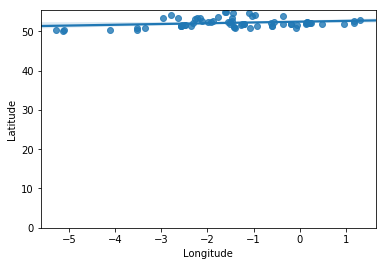

In [31]:
sns.regplot(x="Longitude", y="Latitude", data=df)
plt.ylim(0,)

In [0]:
# Looking at the plot gives us some insight into our data. We expect to see the results to have zero mean, 
#distributed evenly around the x axis with similar variance. 
#There is no curvature. This type of residual plot suggests a linear plot is appropriate. 

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

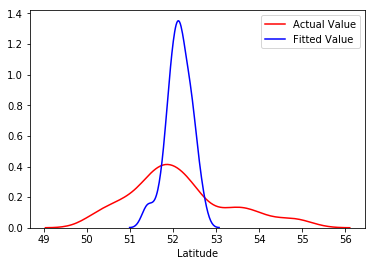

In [41]:
ax1 = sns.distplot(df['Latitude'], hist=False, color ="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color ="b", label="Fitted Value", ax = ax1)

In [0]:
import numpy as np


In [0]:
new_input=np.arange(1, 60, 1).reshape(-1, 1)

In [44]:
yhat=lm.predict(new_input)
yhat[0:5]

array([52.62151336, 52.81875714, 53.01600093, 53.21324471, 53.4104885 ])

In [0]:
###Now Foursquare API will be used to support the findings of new UKSPA location


In [0]:
### Import necessary Libraries


In [45]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


In [46]:
CLIENT_ID = 'HRYCYRRH44B02GOSP1MNOVC1AVLFQTAIT1ZFSSMIXBAFXF13' # your Foursquare ID
CLIENT_SECRET = 'MGW2M22FVAXDIIQOE42J55BRE0KCCSYLEUHPT3JOBICD55OR' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: HRYCYRRH44B02GOSP1MNOVC1AVLFQTAIT1ZFSSMIXBAFXF13
CLIENT_SECRET:MGW2M22FVAXDIIQOE42J55BRE0KCCSYLEUHPT3JOBICD55OR


In [0]:
geolocator = Nominatim(user_agent="foursquare_agent")


In [0]:
latitude = 52.35398724
longitude = -1.55265731

In [52]:
search_query = 'Coffee Shop'
radius = 50000
print(search_query + ' .... OK!')

Coffee Shop .... OK!


In [53]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=HRYCYRRH44B02GOSP1MNOVC1AVLFQTAIT1ZFSSMIXBAFXF13&client_secret=MGW2M22FVAXDIIQOE42J55BRE0KCCSYLEUHPT3JOBICD55OR&ll=52.35398724,-1.55265731&v=20180604&query=Coffee Shop&radius=50000&limit=30'

In [54]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d5700ea4eefd0002594edd6'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'primary': True,
      'shortName': 'Coffee Shop'}],
    'hasPerk': False,
    'id': '54180c6b498efce0df1d0f2c',
    'location': {'address': '6 Millar Court',
     'cc': 'GB',
     'city': 'Kenilworth',
     'country': 'United Kingdom',
     'crossStreet': 'Station Road',
     'distance': 2064,
     'formattedAddress': ['6 Millar Court (Station Road)',
      'Kenilworth',
      'Warwickshire',
      'CV8 1JD',
      'United Kingdom'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 52.343034,
       'lng': -1.577156}],
     'lat': 52.343034,
     'lng': -1.577156,
     'postalCode': 'CV8 1JD',
     'state': 'Warwickshire'},
    'name': 'Modern Kitchen Coffee 

In [55]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,54180c6b498efce0df1d0f2c,6 Millar Court,GB,Kenilworth,United Kingdom,Station Road,2064,"[6 Millar Court (Station Road), Kenilworth, Wa...","[{'label': 'display', 'lat': 52.343034, 'lng':...",52.343034,-1.577156,NaN,CV8 1JD,Warwickshire,Modern Kitchen Coffee Shop,v-1565982954
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'C...",False,4c39b14093db0f470ecf2392,NaN,GB,Stratford-upon-Avon,United Kingdom,NaN,20720,"[Stratford-upon-Avon, Warwickshire, United Kin...","[{'label': 'display', 'lat': 52.191633, 'lng':...",52.191633,-1.701425,NaN,NaN,Warwickshire,Riverside Coffee Shop,v-1565982954
2,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,57f3923f498e1bb993516bbe,NaN,GB,Wolverhampton,United Kingdom,NaN,60119,"[Wolverhampton, West Midlands, WV7, United Kin...","[{'label': 'display', 'lat': 52.645143, 'lng':...",52.645143,-2.299849,NaN,WV7,West Midlands,the coffee shop,v-1565982954
3,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,5b3d7189c0cacb002c93599d,"Shop 2 Central Buildings, Warwick Rd",GB,Coventry,United Kingdom,NaN,5890,"[Shop 2 Central Buildings, Warwick Rd, Coventr...","[{'label': 'display', 'lat': 52.4017069, 'lng'...",52.401707,-1.515182,NaN,CV3 6AJ,Coventry,Murray's Coffee Shop,v-1565982954
4,[],False,4dea48b41f6e3ddebdc72fbd,NaN,GB,NaN,United Kingdom,NaN,38984,[United Kingdom],"[{'label': 'display', 'lat': 52.03392584469754...",52.033926,-1.320775,NaN,NaN,NaN,Oak Coffee Shop,v-1565982954


In [56]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered


,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,Modern Kitchen Coffee Shop,Coffee Shop,6 Millar Court,GB,Kenilworth,United Kingdom,Station Road,2064,"[6 Millar Court (Station Road), Kenilworth, Wa...","[{'label': 'display', 'lat': 52.343034, 'lng':...",52.343034,-1.577156,NaN,CV8 1JD,Warwickshire,54180c6b498efce0df1d0f2c
1,Riverside Coffee Shop,Coffee Shop,NaN,GB,Stratford-upon-Avon,United Kingdom,NaN,20720,"[Stratford-upon-Avon, Warwickshire, United Kin...","[{'label': 'display', 'lat': 52.191633, 'lng':...",52.191633,-1.701425,NaN,NaN,Warwickshire,4c39b14093db0f470ecf2392
2,the coffee shop,Café,NaN,GB,Wolverhampton,United Kingdom,NaN,60119,"[Wolverhampton, West Midlands, WV7, United Kin...","[{'label': 'display', 'lat': 52.645143, 'lng':...",52.645143,-2.299849,NaN,WV7,West Midlands,57f3923f498e1bb993516bbe
3,Murray's Coffee Shop,Café,"Shop 2 Central Buildings, Warwick Rd",GB,Coventry,United Kingdom,NaN,5890,"[Shop 2 Central Buildings, Warwick Rd, Coventr...","[{'label': 'display', 'lat': 52.4017069, 'lng'...",52.401707,-1.515182,NaN,CV3 6AJ,Coventry,5b3d7189c0cacb002c93599d
4,Oak Coffee Shop,None,NaN,GB,NaN,United Kingdom,NaN,38984,[United Kingdom],"[{'label': 'display', 'lat': 52.03392584469754...",52.033926,-1.320775,NaN,NaN,NaN,4dea48b41f6e3ddebdc72fbd
5,Warwick Hospital Coffee Shop & Restaurant,Coffee Shop,"Warwick Hospital, Lakin Road",GB,Warwick,United Kingdom,NaN,7405,"[Warwick Hospital, Lakin Road, Warwick, Warwic...","[{'label': 'display', 'lat': 52.290165, 'lng':...",52.290165,-1.583358,NaN,C V34,Warwickshire,57f21751498e407ba448741d
6,Clent Nurseries Coffee Shop,Coffee Shop,"Clent Nerseries, Bromsgrove Rd.",GB,Stourbridge,United Kingdom,NaN,39050,"[Clent Nerseries, Bromsgrove Rd., Stourbridge,...","[{'label': 'display', 'lat': 52.412319, 'lng':...",52.412319,-2.119382,NaN,DY9 9QA,Dudley,5d330b698fe07d000842ab08
7,Manteli's Coffee Shop,Coffee Shop,9 The Green,GB,Kings Norton,United Kingdom,NaN,26233,"[9 The Green, Kings Norton, West Midlands, B38...","[{'label': 'display', 'lat': 52.40738069768952...",52.407381,-1.928681,NaN,B38 8SD,West Midlands,4e16d2bab0fb42f98735c042
8,Elgars Coffee Shop & Restaurant,Coffee Shop,"16 Reindeer Court, Mealcheapen St",GB,Worcester,United Kingdom,NaN,48830,"[16 Reindeer Court, Mealcheapen St, Worcester,...","[{'label': 'display', 'lat': 52.192229, 'lng':...",52.192229,-2.219016,NaN,WR1 2DS,Worcestershire,4db80e64fa8c377d83b59d68
9,Miley's Coffee Shop,Café,Box Trees,GB,Hockley Heath,United Kingdom,Stratford Road,15611,"[Box Trees (Stratford Road), Hockley Heath, So...","[{'label': 'display', 'lat': 52.36605014470304...",52.366050,-1.781444,NaN,NaN,Solihull,50657d38e4b0b313aaf0e95d


In [57]:
dataframe_filtered.name


0                    Modern Kitchen Coffee Shop
1                         Riverside Coffee Shop
2                              the  coffee shop
3                          Murray's Coffee Shop
4                               Oak Coffee Shop
5     Warwick Hospital Coffee Shop & Restaurant
6                   Clent Nurseries Coffee Shop
7                         Manteli's Coffee Shop
8               Elgars Coffee Shop & Restaurant
9                           Miley's Coffee Shop
10                          Gateway Coffee Shop
11                Solihull Hospital Coffee Shop
12                        Piccolo's Coffee Shop
13                              The Coffee Shop
14                            Oasis Coffee Shop
15                        Phillie's Coffee Shop
16                         Eastside Coffee Shop
17                         Sandra's Coffee Shop
18                          Jaspers Coffee Shop
19                      The Willows Coffee Shop
20                         Old Barn Coff